In [60]:
!pip install networkx
!pip install imageio
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.integrate import solve_ivp
from scipy.linalg import eig
from sklearn.metrics import pairwise_distances
import networkx as nx

Task 2.2
Матрица связности (А) и матрица инциндентности (В)
A = B*trB - alpha*I

alpha = ?

In [61]:
# random graph
N = 5
A = np.zeros(shape=(N, N))
while (A.sum(axis=1) == 0).any():
    A = np.random.randint(0, 2, size=(N, N))
    for i in range(N):
        A[i, i] = 0
        for j in range(i):
            yes = max(A[i, j], A[j, i])
            A[i, j] = A[j, i] = yes
P = A.T @ np.diag(1 / A.sum(axis=1))
assert(np.allclose(P.sum(axis=0), 1.0))


def incidence_matrix_from_adjacency(adjacency_matrix):
    N = len(adjacency_matrix)
    edges = []
    for i in range(N):
        for j in range(i + 1, N):
            if adjacency_matrix[i, j] == 1:
                edges.append((i, j))

    M = len(edges)
    B = np.zeros((N, M), dtype=int)

    for k, (v1, v2) in enumerate(edges):
        B[v1, k] = 1
        B[v2, k] = 1

    return B


def find_alpha(A, B):
    trB = np.trace(B)
    B_trB = B * trB
    diag_A = np.diag(A)
    alpha = (np.sum(diag_A) - np.trace(B_trB)) / len(A)

    return alpha
    
B = incidence_matrix_from_adjacency(A)
alpha = find_alpha(A, B)
print("Значение alpha:", alpha)



Значение alpha: -0.2


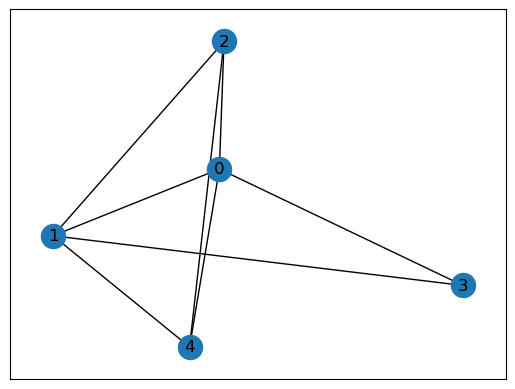

In [55]:
graph = nx.from_numpy_array(A, parallel_edges=True)
nx.draw_networkx(graph)

In [56]:
A, P, B

(array([[0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 0, 1],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0]]),
 array([[0.        , 0.25      , 0.33333333, 0.5       , 0.33333333],
        [0.25      , 0.        , 0.33333333, 0.5       , 0.33333333],
        [0.25      , 0.25      , 0.        , 0.        , 0.33333333],
        [0.25      , 0.25      , 0.        , 0.        , 0.        ],
        [0.25      , 0.25      , 0.33333333, 0.        , 0.        ]]),
 array([[1, 1, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 0, 1, 0, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 1]]))

Task 2.3 
Оценить граф Московсокго метро, выявить самые загруженные станции.

In [43]:
import networkx as nx

data = {"objects":[{"id":82,"title":"Авиамоторная","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":82,"title":"Авиамоторная","line":{"id":49,"title":"MЦД3"}},{"id":29,"title":"Автозаводская","line":{"id":2,"title":"Замоскворецкая"}},{"id":101,"title":"Академическая","line":{"id":6,"title":"Калужско-Рижская"}},{"id":54,"title":"Александровский сад","line":{"id":4,"title":"Филёвская"}},{"id":91,"title":"Алексеевская","line":{"id":6,"title":"Калужско-Рижская"}},{"id":540,"title":"Алма-Атинская","line":{"id":2,"title":"Замоскворецкая"}},{"id":129,"title":"Алтуфьево","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":702,"title":"Аминьевская","line":{"id":50,"title":"MЦД4"}},{"id":589,"title":"Андроновка","line":{"id":44,"title":"МЦК"}},{"id":589,"title":"Андроновка","line":{"id":49,"title":"MЦД3"}},{"id":689,"title":"Аникеевка","line":{"id":48,"title":"МЦД2"}},{"id":163,"title":"Аннино","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":740,"title":"Апрелевка","line":{"id":50,"title":"MЦД4"}},{"id":44,"title":"Арбатская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":37,"title":"Аэропорт","line":{"id":2,"title":"Замоскворецкая"}},{"id":87,"title":"Бабушкинская","line":{"id":6,"title":"Калужско-Рижская"}},{"id":61,"title":"Багратионовская","line":{"id":4,"title":"Филёвская"}},{"id":655,"title":"Баковка","line":{"id":47,"title":"МЦД1"}},{"id":604,"title":"Балтийская","line":{"id":44,"title":"МЦК"}},{"id":120,"title":"Баррикадная","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":47,"title":"Бауманская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":122,"title":"Беговая","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":585,"title":"Белокаменная","line":{"id":44,"title":"МЦК"}},{"id":621,"title":"Беломорская","line":{"id":2,"title":"Замоскворецкая"}},{"id":35,"title":"Белорусская","line":{"id":2,"title":"Замоскворецкая"}},{"id":35,"title":"Белорусская","line":{"id":50,"title":"MЦД4"}},{"id":105,"title":"Беляево","line":{"id":6,"title":"Калужско-Рижская"}},{"id":641,"title":"Бескудниково","line":{"id":47,"title":"МЦД1"}},{"id":130,"title":"Бибирево","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":11,"title":"Библиотека им. Ленина","line":{"id":1,"title":"Сокольническая"}},{"id":662,"title":"Битца","line":{"id":48,"title":"МЦД2"}},{"id":552,"title":"Битцевский парк","line":{"id":12,"title":"Бутовская"}},{"id":536,"title":"Борисово","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":140,"title":"Боровицкая","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":616,"title":"Боровское шоссе","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":89,"title":"Ботанический сад","line":{"id":6,"title":"Калужско-Рижская"}},{"id":158,"title":"Братиславская","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":193,"title":"Бульвар адмирала Ушакова","line":{"id":12,"title":"Бутовская"}},{"id":164,"title":"Бульвар Дмитрия Донского","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":1,"title":"Бульвар Рокоссовского","line":{"id":1,"title":"Сокольническая"}},{"id":195,"title":"Бунинская аллея","line":{"id":12,"title":"Бутовская"}},{"id":661,"title":"Бутово","line":{"id":48,"title":"МЦД2"}},{"id":578,"title":"Бутырская","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":732,"title":"Быково","line":{"id":49,"title":"MЦД3"}},{"id":27,"title":"Варшавская","line":{"id":None,"title":None}},{"id":90,"title":"ВДНХ","line":{"id":6,"title":"Калужско-Рижская"}},{"id":594,"title":"Верхние Котлы","line":{"id":44,"title":"МЦК"}},{"id":610,"title":"Верхние Лихоборы","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":724,"title":"Вешняки","line":{"id":49,"title":"MЦД3"}},{"id":132,"title":"Владыкино","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":747,"title":"Внуково","line":{"id":50,"title":"MЦД4"}},{"id":636,"title":"Водники","line":{"id":47,"title":"МЦД1"}},{"id":40,"title":"Водный стадион","line":{"id":2,"title":"Замоскворецкая"}},{"id":39,"title":"Войковская","line":{"id":2,"title":"Замоскворецкая"}},{"id":114,"title":"Волгоградский проспект","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":156,"title":"Волжская","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":524,"title":"Волоколамская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":16,"title":"Воробьёвы горы","line":{"id":1,"title":"Сокольническая"}},{"id":703,"title":"Воронцовская","line":{"id":None,"title":None}},{"id":197,"title":"Выставочная","line":{"id":4,"title":"Филёвская"}},{"id":513,"title":"Выставочный центр","line":{"id":17,"title":"Монорельс (М1)"}},{"id":110,"title":"Выхино","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":110,"title":"Выхино","line":{"id":49,"title":"MЦД3"}},{"id":618,"title":"Говорово","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":678,"title":"Гражданская","line":{"id":48,"title":"МЦД2"}},{"id":717,"title":"Грачёвская","line":{"id":49,"title":"MЦД3"}},{"id":701,"title":"Давыдково","line":{"id":None,"title":None}},{"id":642,"title":"Дегунино","line":{"id":47,"title":"МЦД1"}},{"id":555,"title":"Деловой центр","line":{"id":45,"title":"Большая кольцевая линия"}},{"id":598,"title":"Деловой центр (МЦК)","line":{"id":44,"title":"МЦК"}},{"id":668,"title":"Депо","line":{"id":48,"title":"МЦД2"}},{"id":36,"title":"Динамо","line":{"id":2,"title":"Замоскворецкая"}},{"id":135,"title":"Дмитровская","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":74,"title":"Добрынинская","line":{"id":5,"title":"Кольцевая"}},{"id":637,"title":"Долгопрудная","line":{"id":47,"title":"МЦД1"}},{"id":21,"title":"Домодедовская","line":{"id":2,"title":"Замоскворецкая"}},{"id":526,"title":"Достоевская","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":161,"title":"Дубровка","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":736,"title":"Есенинская","line":{"id":49,"title":"MЦД3"}},{"id":763,"title":"Железнодорожная","line":{"id":50,"title":"MЦД4"}},{"id":551,"title":"Жулебино","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":593,"title":"ЗИЛ","line":{"id":44,"title":"МЦК"}},{"id":601,"title":"Зорге","line":{"id":44,"title":"МЦК"}},{"id":705,"title":"Зюзино","line":{"id":45,"title":"Большая кольцевая линия"}},{"id":534,"title":"Зябликово","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":587,"title":"Измайлово","line":{"id":44,"title":"МЦК"}},{"id":51,"title":"Измайловская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":733,"title":"Ильинская","line":{"id":49,"title":"MЦД3"}},{"id":739,"title":"Ипподром","line":{"id":49,"title":"MЦД3"}},{"id":721,"title":"Казанский вокзал","line":{"id":49,"title":"MЦД3"}},{"id":672,"title":"Калитники","line":{"id":48,"title":"МЦД2"}},{"id":104,"title":"Калужская","line":{"id":6,"title":"Калужско-Рижская"}},{"id":24,"title":"Кантемировская","line":{"id":2,"title":"Замоскворецкая"}},{"id":26,"title":"Каховская","line":{"id":None,"title":None}},{"id":25,"title":"Каширская","line":{"id":2,"title":"Замоскворецкая"}},{"id":42,"title":"Киевская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":96,"title":"Китай-город","line":{"id":6,"title":"Калужско-Рижская"}},{"id":706,"title":"Кленовый бульвар","line":{"id":45,"title":"Большая кольцевая линия"}},{"id":154,"title":"Кожуховская","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":744,"title":"Кокошкино","line":{"id":50,"title":"MЦД4"}},{"id":28,"title":"Коломенская","line":{"id":2,"title":"Замоскворецкая"}},{"id":629,"title":"Коммунарка","line":{"id":None,"title":None}},{"id":6,"title":"Комсомольская","line":{"id":1,"title":"Сокольническая"}},{"id":106,"title":"Коньково","line":{"id":6,"title":"Калужско-Рижская"}},{"id":605,"title":"Коптево","line":{"id":44,"title":"МЦК"}},{"id":622,"title":"Косино","line":{"id":46,"title":"Некрасовская"}},{"id":622,"title":"Косино","line":{"id":49,"title":"MЦД3"}},{"id":571,"title":"Котельники","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":729,"title":"Красково","line":{"id":49,"title":"MЦД3"}},{"id":20,"title":"Красногвардейская","line":{"id":2,"title":"Замоскворецкая"}},{"id":687,"title":"Красногорская","line":{"id":48,"title":"МЦД2"}},{"id":78,"title":"Краснопресненская","line":{"id":5,"title":"Кольцевая"}},{"id":5,"title":"Красносельская","line":{"id":1,"title":"Сокольническая"}},{"id":7,"title":"Красные ворота","line":{"id":1,"title":"Сокольническая"}},{"id":679,"title":"Красный Балтиец","line":{"id":48,"title":"МЦД2"}},{"id":663,"title":"Красный Строитель","line":{"id":48,"title":"МЦД2"}},{"id":735,"title":"Кратово","line":{"id":49,"title":"MЦД3"}},{"id":742,"title":"Крёкшино","line":{"id":50,"title":"MЦД4"}},{"id":153,"title":"Крестьянская застава","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":12,"title":"Кропоткинская","line":{"id":1,"title":"Сокольническая"}},{"id":66,"title":"Крылатское","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":595,"title":"Крымская","line":{"id":44,"title":"МЦК"}},{"id":708,"title":"Крюково","line":{"id":49,"title":"MЦД3"}},{"id":669,"title":"Кубанская","line":{"id":48,"title":"МЦД2"}},{"id":118,"title":"Кузнецкий мост","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":112,"title":"Кузьминки","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":64,"title":"Кунцевская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":46,"title":"Курская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":46,"title":"Курская","line":{"id":50,"title":"MЦД4"}},{"id":697,"title":"Курьяново","line":{"id":48,"title":"МЦД2"}},{"id":757,"title":"Кусково","line":{"id":50,"title":"MЦД4"}},{"id":59,"title":"Кутузовская","line":{"id":4,"title":"Филёвская"}},{"id":59,"title":"Кутузовская","line":{"id":50,"title":"MЦД4"}},{"id":761,"title":"Кучино","line":{"id":50,"title":"MЦД4"}},{"id":716,"title":"Левобережная","line":{"id":49,"title":"MЦД3"}},{"id":720,"title":"Ленинградский вокзал","line":{"id":49,"title":"MЦД3"}},{"id":100,"title":"Ленинский проспект","line":{"id":6,"title":"Калужско-Рижская"}},{"id":550,"title":"Лермонтовский проспект","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":746,"title":"Лесной Городок","line":{"id":50,"title":"MЦД4"}},{"id":553,"title":"Лесопарковая","line":{"id":12,"title":"Бутовская"}},{"id":691,"title":"Лефортово","line":{"id":45,"title":"Большая кольцевая линия"}},{"id":765,"title":"Лианозово","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":640,"title":"Лианозово","line":{"id":47,"title":"МЦД1"}},{"id":606,"title":"Лихоборы","line":{"id":44,"title":"МЦК"}},{"id":606,"title":"Лихоборы","line":{"id":49,"title":"MЦД3"}},{"id":633,"title":"Лобня","line":{"id":47,"title":"МЦД1"}},{"id":586,"title":"Локомотив","line":{"id":44,"title":"МЦК"}},{"id":576,"title":"Ломоносовский проспект","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":9,"title":"Лубянка","line":{"id":1,"title":"Сокольническая"}},{"id":597,"title":"Лужники","line":{"id":44,"title":"МЦК"}},{"id":624,"title":"Лухмановская","line":{"id":46,"title":"Некрасовская"}},{"id":726,"title":"Люберцы","line":{"id":49,"title":"MЦД3"}},{"id":157,"title":"Люблино","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":730,"title":"Малаховка","line":{"id":49,"title":"MЦД3"}},{"id":639,"title":"Марк","line":{"id":47,"title":"МЦД1"}},{"id":84,"title":"Марксистская","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":527,"title":"Марьина роща","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":527,"title":"Марьина роща","line":{"id":50,"title":"MЦД4"}},{"id":159,"title":"Марьино","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":753,"title":"Матвеевская","line":{"id":50,"title":"MЦД4"}},{"id":34,"title":"Маяковская","line":{"id":2,"title":"Замоскворецкая"}},{"id":86,"title":"Медведково","line":{"id":6,"title":"Калужско-Рижская"}},{"id":196,"title":"Международная","line":{"id":4,"title":"Филёвская"}},{"id":137,"title":"Менделеевская","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":751,"title":"Мещерская","line":{"id":50,"title":"MЦД4"}},{"id":575,"title":"Минская","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":575,"title":"Минская","line":{"id":50,"title":"MЦД4"}},{"id":525,"title":"Митино","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":748,"title":"Мичуринец","line":{"id":50,"title":"MЦД4"}},{"id":620,"title":"Мичуринский проспект","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":698,"title":"Мнёвники","line":{"id":None,"title":None}},{"id":714,"title":"Молжаниново","line":{"id":49,"title":"MЦД3"}},{"id":65,"title":"Молодёжная","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":673,"title":"Москва-Товарная","line":{"id":48,"title":"МЦД2"}},{"id":666,"title":"Москворечье","line":{"id":48,"title":"МЦД2"}},{"id":718,"title":"Моссельмаш","line":{"id":49,"title":"MЦД3"}},{"id":523,"title":"Мякинино","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":144,"title":"Нагатинская","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":707,"title":"Нагатинский Затон","line":{"id":45,"title":"Большая кольцевая линия"}},{"id":145,"title":"Нагорная","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":699,"title":"Народное ополчение","line":{"id":None,"title":None}},{"id":690,"title":"Нахабино","line":{"id":48,"title":"МЦД2"}},{"id":146,"title":"Нахимовский проспект","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":625,"title":"Некрасовка","line":{"id":46,"title":"Некрасовская"}},{"id":653,"title":"Немчиновка","line":{"id":47,"title":"МЦД1"}},{"id":590,"title":"Нижегородская","line":{"id":44,"title":"МЦК"}},{"id":590,"title":"Нижегородская","line":{"id":50,"title":"MЦД4"}},{"id":759,"title":"Никольское","line":{"id":50,"title":"MЦД4"}},{"id":700,"title":"Новаторская","line":{"id":None,"title":None}},{"id":79,"title":"Новогиреево","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":79,"title":"Новогиреево","line":{"id":50,"title":"MЦД4"}},{"id":638,"title":"Новодачная","line":{"id":47,"title":"МЦД1"}},{"id":542,"title":"Новокосино","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":31,"title":"Новокузнецкая","line":{"id":2,"title":"Замоскворецкая"}},{"id":615,"title":"Новопеределкино","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":615,"title":"Новопеределкино","line":{"id":50,"title":"MЦД4"}},{"id":713,"title":"Новоподрезково","line":{"id":49,"title":"MЦД3"}},{"id":68,"title":"Новослободская","line":{"id":5,"title":"Кольцевая"}},{"id":591,"title":"Новохохловская","line":{"id":44,"title":"МЦК"}},{"id":109,"title":"Новоясеневская","line":{"id":6,"title":"Калужско-Рижская"}},{"id":103,"title":"Новые Черёмушки","line":{"id":6,"title":"Калужско-Рижская"}},{"id":656,"title":"Одинцово","line":{"id":47,"title":"МЦД1"}},{"id":619,"title":"Озёрная","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":583,"title":"Окружная","line":{"id":44,"title":"МЦК"}},{"id":693,"title":"Окская","line":{"id":46,"title":"Некрасовская"}},{"id":98,"title":"Октябрьская","line":{"id":6,"title":"Калужско-Рижская"}},{"id":124,"title":"Октябрьское поле","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":762,"title":"Ольгино","line":{"id":50,"title":"MЦД4"}},{"id":628,"title":"Ольховая","line":{"id":None,"title":None}},{"id":688,"title":"Опалиха","line":{"id":48,"title":"МЦД2"}},{"id":22,"title":"Орехово","line":{"id":2,"title":"Замоскворецкая"}},{"id":719,"title":"Останкино","line":{"id":49,"title":"MЦД3"}},{"id":659,"title":"Остафьево","line":{"id":48,"title":"МЦД2"}},{"id":734,"title":"Отдых","line":{"id":49,"title":"MЦД3"}},{"id":131,"title":"Отрадное","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":10,"title":"Охотный ряд","line":{"id":1,"title":"Сокольническая"}},{"id":752,"title":"Очаково","line":{"id":50,"title":"MЦД4"}},{"id":30,"title":"Павелецкая","line":{"id":2,"title":"Замоскворецкая"}},{"id":686,"title":"Павшино","line":{"id":48,"title":"МЦД2"}},{"id":727,"title":"Панки","line":{"id":49,"title":"MЦД3"}},{"id":602,"title":"Панфиловская","line":{"id":44,"title":"МЦК"}},{"id":13,"title":"Парк Культуры","line":{"id":1,"title":"Сокольническая"}},{"id":165,"title":"Парк Победы","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":50,"title":"Партизанская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":685,"title":"Пенягино","line":{"id":48,"title":"МЦД2"}},{"id":52,"title":"Первомайская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":749,"title":"Переделкино","line":{"id":50,"title":"MЦД4"}},{"id":667,"title":"Перерва","line":{"id":48,"title":"МЦД2"}},{"id":80,"title":"Перово","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":80,"title":"Перово","line":{"id":49,"title":"MЦД3"}},{"id":582,"title":"Петровский парк","line":{"id":45,"title":"Большая кольцевая линия"}},{"id":133,"title":"Петровско-Разумовская","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":133,"title":"Петровско-Разумовская","line":{"id":49,"title":"MЦД3"}},{"id":155,"title":"Печатники","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":63,"title":"Пионерская","line":{"id":4,"title":"Филёвская"}},{"id":128,"title":"Планерная","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":709,"title":"Платформа Малино","line":{"id":49,"title":"MЦД3"}},{"id":596,"title":"Площадь Гагарина","line":{"id":44,"title":"МЦК"}},{"id":83,"title":"Площадь Ильича","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":45,"title":"Площадь Революции","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":675,"title":"Площадь трёх вокзалов","line":{"id":48,"title":"МЦД2"}},{"id":675,"title":"Площадь трёх вокзалов","line":{"id":50,"title":"MЦД4"}},{"id":723,"title":"Плющево","line":{"id":49,"title":"MЦД3"}},{"id":741,"title":"Победа","line":{"id":50,"title":"MЦД4"}},{"id":657,"title":"Подольск","line":{"id":48,"title":"МЦД2"}},{"id":712,"title":"Подрезково","line":{"id":49,"title":"MЦД3"}},{"id":754,"title":"Поклонная","line":{"id":50,"title":"MЦД4"}},{"id":664,"title":"Покровское","line":{"id":48,"title":"МЦД2"}},{"id":681,"title":"Покровское-Стрешнево","line":{"id":48,"title":"МЦД2"}},{"id":123,"title":"Полежаевская","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":141,"title":"Полянка","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":150,"title":"Пражская","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":3,"title":"Преображенская площадь","line":{"id":1,"title":"Сокольническая"}},{"id":627,"title":"Прокшино","line":{"id":None,"title":None}},{"id":115,"title":"Пролетарская","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":18,"title":"Проспект Вернадского","line":{"id":1,"title":"Сокольническая"}},{"id":93,"title":"Проспект Мира","line":{"id":6,"title":"Калужско-Рижская"}},{"id":102,"title":"Профсоюзная","line":{"id":6,"title":"Калужско-Рижская"}},{"id":119,"title":"Пушкинская","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":541,"title":"Пятницкое Шоссе","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":651,"title":"Рабочий посёлок","line":{"id":47,"title":"МЦД1"}},{"id":577,"title":"Раменки","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":738,"title":"Раменское","line":{"id":49,"title":"MЦД3"}},{"id":614,"title":"Рассказовка","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":758,"title":"Реутов","line":{"id":50,"title":"MЦД4"}},{"id":41,"title":"Речной вокзал","line":{"id":2,"title":"Замоскворецкая"}},{"id":92,"title":"Рижская","line":{"id":6,"title":"Калужско-Рижская"}},{"id":152,"title":"Римская","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":584,"title":"Ростокино","line":{"id":44,"title":"МЦК"}},{"id":572,"title":"Румянцево","line":{"id":1,"title":"Сокольническая"}},{"id":111,"title":"Рязанский проспект","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":136,"title":"Савёловская","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":136,"title":"Савёловская","line":{"id":50,"title":"MЦД4"}},{"id":574,"title":"Саларьево","line":{"id":1,"title":"Сокольническая"}},{"id":760,"title":"Салтыковская","line":{"id":50,"title":"MЦД4"}},{"id":743,"title":"Санино","line":{"id":50,"title":"MЦД4"}},{"id":88,"title":"Свиблово","line":{"id":6,"title":"Калужско-Рижская"}},{"id":147,"title":"Севастопольская","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":611,"title":"Селигерская","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":49,"title":"Семёновская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":755,"title":"Серп и Молот","line":{"id":50,"title":"MЦД4"}},{"id":142,"title":"Серпуховская","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":652,"title":"Сетунь","line":{"id":47,"title":"МЦД1"}},{"id":658,"title":"Силикатная","line":{"id":48,"title":"МЦД2"}},{"id":654,"title":"Сколково","line":{"id":47,"title":"МЦД1"}},{"id":201,"title":"Славянский бульвар","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":43,"title":"Смоленская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":38,"title":"Сокол","line":{"id":2,"title":"Замоскворецкая"}},{"id":588,"title":"Соколиная Гора","line":{"id":44,"title":"МЦК"}},{"id":4,"title":"Сокольники","line":{"id":1,"title":"Сокольническая"}},{"id":750,"title":"Солнечная","line":{"id":50,"title":"MЦД4"}},{"id":617,"title":"Солнцево","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":722,"title":"Сортировочная","line":{"id":49,"title":"MЦД3"}},{"id":554,"title":"Спартак","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":15,"title":"Спортивная","line":{"id":1,"title":"Сокольническая"}},{"id":199,"title":"Сретенский бульвар","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":692,"title":"Стахановская","line":{"id":46,"title":"Некрасовская"}},{"id":603,"title":"Стрешнево","line":{"id":44,"title":"МЦК"}},{"id":198,"title":"Строгино","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":58,"title":"Студенческая","line":{"id":4,"title":"Филёвская"}},{"id":94,"title":"Сухаревская","line":{"id":6,"title":"Калужско-Рижская"}},{"id":127,"title":"Сходненская","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":711,"title":"Сходня","line":{"id":49,"title":"MЦД3"}},{"id":72,"title":"Таганская","line":{"id":5,"title":"Кольцевая"}},{"id":33,"title":"Тверская","line":{"id":2,"title":"Замоскворецкая"}},{"id":32,"title":"Театральная","line":{"id":2,"title":"Замоскворецкая"}},{"id":113,"title":"Текстильщики","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":511,"title":"Телецентр","line":{"id":17,"title":"Монорельс (М1)"}},{"id":107,"title":"Тёплый Стан","line":{"id":6,"title":"Калужско-Рижская"}},{"id":704,"title":"Терехово","line":{"id":45,"title":"Большая кольцевая линия"}},{"id":648,"title":"Тестовская","line":{"id":47,"title":"МЦД1"}},{"id":648,"title":"Тестовская","line":{"id":50,"title":"MЦД4"}},{"id":573,"title":"Технопарк","line":{"id":2,"title":"Замоскворецкая"}},{"id":134,"title":"Тимирязевская","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":745,"title":"Толстопальцево","line":{"id":50,"title":"MЦД4"}},{"id":728,"title":"Томилино","line":{"id":49,"title":"MЦД3"}},{"id":85,"title":"Третьяковская","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":683,"title":"Трикотажная","line":{"id":48,"title":"МЦД2"}},{"id":570,"title":"Тропарёво","line":{"id":1,"title":"Сокольническая"}},{"id":200,"title":"Трубная","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":143,"title":"Тульская","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":95,"title":"Тургеневская","line":{"id":6,"title":"Калужско-Рижская"}},{"id":126,"title":"Тушинская","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":592,"title":"Угрешская","line":{"id":44,"title":"МЦК"}},{"id":731,"title":"Удельная","line":{"id":49,"title":"MЦД3"}},{"id":121,"title":"Улица 1905 года","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":512,"title":"Улица Академика Королёва","line":{"id":17,"title":"Монорельс (М1)"}},{"id":162,"title":"Улица Академика Янгеля","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":194,"title":"Улица Горчакова","line":{"id":12,"title":"Бутовская"}},{"id":623,"title":"Улица Дмитриевского","line":{"id":46,"title":"Некрасовская"}},{"id":510,"title":"Улица Милашенкова","line":{"id":17,"title":"Монорельс (М1)"}},{"id":514,"title":"Улица Сергея Эйзенштейна","line":{"id":17,"title":"Монорельс (М1)"}},{"id":192,"title":"Улица Скобелевская","line":{"id":12,"title":"Бутовская"}},{"id":191,"title":"Улица Старокачаловская","line":{"id":12,"title":"Бутовская"}},{"id":17,"title":"Университет","line":{"id":1,"title":"Сокольническая"}},{"id":725,"title":"Ухтомская","line":{"id":49,"title":"MЦД3"}},{"id":737,"title":"Фабричная","line":{"id":49,"title":"MЦД3"}},{"id":764,"title":"Физтех","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":626,"title":"Филатов Луг","line":{"id":None,"title":None}},{"id":62,"title":"Филёвский парк","line":{"id":4,"title":"Филёвская"}},{"id":60,"title":"Фили","line":{"id":4,"title":"Филёвская"}},{"id":710,"title":"Фирсановская","line":{"id":49,"title":"MЦД3"}},{"id":579,"title":"Фонвизинская","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":14,"title":"Фрунзенская","line":{"id":1,"title":"Сокольническая"}},{"id":715,"title":"Химки","line":{"id":49,"title":"MЦД3"}},{"id":635,"title":"Хлебниково","line":{"id":47,"title":"МЦД1"}},{"id":608,"title":"Ховрино","line":{"id":2,"title":"Замоскворецкая"}},{"id":608,"title":"Ховрино","line":{"id":49,"title":"MЦД3"}},{"id":600,"title":"Хорошёво","line":{"id":44,"title":"МЦК"}},{"id":580,"title":"Хорошёвская","line":{"id":45,"title":"Большая кольцевая линия"}},{"id":23,"title":"Царицыно","line":{"id":2,"title":"Замоскворецкая"}},{"id":138,"title":"Цветной бульвар","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":581,"title":"ЦСКА","line":{"id":45,"title":"Большая кольцевая линия"}},{"id":2,"title":"Черкизовская","line":{"id":1,"title":"Сокольническая"}},{"id":148,"title":"Чертановская","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":139,"title":"Чеховская","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":8,"title":"Чистые пруды","line":{"id":1,"title":"Сокольническая"}},{"id":151,"title":"Чкаловская","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":756,"title":"Чухлинка","line":{"id":50,"title":"MЦД4"}},{"id":99,"title":"Шаболовская","line":{"id":6,"title":"Калужско-Рижская"}},{"id":599,"title":"Шелепиха","line":{"id":44,"title":"МЦК"}},{"id":634,"title":"Шереметьевская","line":{"id":47,"title":"МЦД1"}},{"id":535,"title":"Шипиловская","line":{"id":10,"title":"Люблинско-Дмитровская"}},{"id":81,"title":"Шоссе Энтузиастов","line":{"id":8,"title":"Калининско-Солнцевская"}},{"id":53,"title":"Щёлковская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":660,"title":"Щербинка","line":{"id":48,"title":"МЦД2"}},{"id":125,"title":"Щукинская","line":{"id":7,"title":"Таганско-Краснопресненская"}},{"id":48,"title":"Электрозаводская","line":{"id":3,"title":"Арбатско-Покровская"}},{"id":48,"title":"Электрозаводская","line":{"id":49,"title":"MЦД3"}},{"id":694,"title":"Юго-Восточная","line":{"id":46,"title":"Некрасовская"}},{"id":19,"title":"Юго-Западная","line":{"id":1,"title":"Сокольническая"}},{"id":149,"title":"Южная","line":{"id":9,"title":"Серпуховско-Тимирязевская"}},{"id":108,"title":"Ясенево","line":{"id":6,"title":"Калужско-Рижская"}},{"id":766,"title":"Яхромская","line":{"id":10,"title":"Люблинско-Дмитровская"}}]}

G = nx.DiGraph()

for station in data["objects"]:
    line_title = station["line"]["title"]
    G.add_node(station["title"], line=line_title)
    for other_station in data["objects"]:
        if other_station != station and other_station["line"]["title"] == line_title:
            G.add_edge(station["title"], other_station["title"])

pagerank_vector = nx.pagerank(G)
most_important_node = max(pagerank_vector, key=pagerank_vector.get)

print(f"The most important node: {most_important_node} with PageRank: {pagerank_vector[most_important_node]}")


The most important node: Площадь трёх вокзалов with PageRank: 0.00543070871688124
